In [1]:
# Import whatever will be used in this notebook
import pylab
import math
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

#import SMOTE to balance trainset 
from imblearn.over_sampling import SMOTE

# Import from sklearn
#Estimators:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Set generation 
from sklearn.model_selection import train_test_split

#Performance metrics:
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#K-fold crossvalidation
from sklearn.model_selection import KFold

In [2]:
# set seed
np.random.seed(123)

In [3]:
# Surpress warnings regarding the version of the pandas library which is used 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Make variable for the imported models
modelSVC = SVC()
modelRF = RandomForestClassifier()
modelLR = LogisticRegression()
modelKNN = KNeighborsClassifier

In [5]:
#read in the csv file and remove the extra ID column
credit = pd.read_csv("C:\\Users\\Jeroen\\Desktop\\Ubiqum\\Data Science\\Excel Files\\credit_3.csv", header = 0)
credit = credit[credit.columns[1:len(credit.columns)]]

In [6]:
#Give head of the df so it is easily visible which vars should function as independent variable
credit.head()
credit.tail()

,PAYSTAT_SEP,CUR_BIL_SEP,PAID_SEP,CREDIT,CREDIT_RATIO,AGE,No_payment,Paid_in_time,Paid_partly,1_month_late,2_months_late,3_months_late,4_months_late,5_months_late,6_months_late,7_months_late,8_months_late,DEFAULT
29461,0.017741,1.849291,0.164656,0.412625,1.132625,0.387036,-0.31168,-0.488987,0.999729,-0.355373,-0.315466,-0.105112,-0.050852,-0.029718,-0.019325,-0.017479,-0.025401,1
29462,-0.875875,-0.682263,-0.234720,-0.127385,-1.004498,0.822032,-0.31168,2.045043,-1.000272,-0.355373,-0.315466,-0.105112,-0.050852,-0.029718,-0.019325,-0.017479,-0.025401,1
29463,3.592206,-0.656821,-0.344828,-1.053118,-0.758007,0.169538,-0.31168,-0.488987,-1.000272,-0.355373,-0.315466,-0.105112,19.664957,-0.029718,-0.019325,-0.017479,-0.025401,0
29464,0.911357,-0.727253,4.803964,-0.667396,1.388081,0.604534,-0.31168,-0.488987,-1.000272,2.813944,-0.315466,-0.105112,-0.050852,-0.029718,-0.019325,-0.017479,-0.025401,0
29465,0.017741,-0.057084,-0.220274,-0.898829,1.384032,1.148279,-0.31168,-0.488987,0.999729,-0.355373,-0.315466,-0.105112,-0.050852,-0.029718,-0.019325,-0.017479,-0.025401,0


In [7]:
#Select the features that will function as independent variables:
credit_indep = credit.iloc[:, 0:(len(credit.columns)-1)]
credit_indep.head()

,PAYSTAT_SEP,CUR_BIL_SEP,PAID_SEP,CREDIT,CREDIT_RATIO,AGE,No_payment,Paid_in_time,Paid_partly,1_month_late,2_months_late,3_months_late,4_months_late,5_months_late,6_months_late,7_months_late,8_months_late
0,1.804974,-0.652117,-0.344828,-1.130262,-0.651099,-1.244199,-0.31168,-0.488987,-1.000272,-0.355373,3.169916,-0.105112,-0.050852,-0.029718,-0.019325,-0.017479,-0.025401
1,-0.875875,-0.668758,-0.344828,-0.358818,-0.999086,-1.026701,-0.31168,2.045043,-1.000272,-0.355373,-0.315466,-0.105112,-0.050852,-0.029718,-0.019325,-0.017479,-0.025401
2,0.017741,-0.309746,-0.253840,-0.590251,-0.649230,-0.156709,-0.31168,-0.488987,0.999729,-0.355373,-0.315466,-0.105112,-0.050852,-0.029718,-0.019325,-0.017479,-0.025401
3,0.017741,-0.069778,-0.224950,-0.898829,1.350797,0.169538,-0.31168,-0.488987,0.999729,-0.355373,-0.315466,-0.105112,-0.050852,-0.029718,-0.019325,-0.017479,-0.025401
4,-0.875875,-0.588526,-0.224950,-0.898829,-0.754215,2.344518,-0.31168,2.045043,-1.000272,-0.355373,-0.315466,-0.105112,-0.050852,-0.029718,-0.019325,-0.017479,-0.025401


In [8]:
#Select the dependent variable and turn it into a seperate vector:
credit_dep = credit['DEFAULT']
credit_dep.head()

0    0
1    0
2    1
3    1
4    1
Name: DEFAULT, dtype: int64

In [9]:
credit.describe()

,PAYSTAT_SEP,CUR_BIL_SEP,PAID_SEP,CREDIT,CREDIT_RATIO,AGE,No_payment,Paid_in_time,Paid_partly,1_month_late,2_months_late,3_months_late,4_months_late,5_months_late,6_months_late,7_months_late,8_months_late,DEFAULT
count,2.946600e+04,2.946600e+04,2.946600e+04,2.946600e+04,2.946600e+04,2.946600e+04,2.946600e+04,2.946600e+04,2.946600e+04,2.946600e+04,2.946600e+04,2.946600e+04,2.946600e+04,2.946600e+04,2.946600e+04,2.946600e+04,2.946600e+04,29466.000000
mean,-3.208420e-15,-2.103345e-16,2.656975e-16,-3.281235e-15,3.921537e-16,4.803280e-16,1.062419e-14,2.150282e-15,1.553156e-15,1.034401e-15,-2.365040e-15,5.959323e-15,-7.981141e-16,-7.367930e-16,-4.664973e-16,-8.970036e-16,-8.155870e-15,0.792914
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,0.405225
min,-1.769491e+00,-2.943419e+00,-3.448283e-01,-1.207406e+00,-4.485552e+00,-1.570446e+00,-3.116795e-01,-4.889872e-01,-1.000272e+00,-3.553731e-01,-3.154657e-01,-1.051123e-01,-5.085188e-02,-2.971788e-02,-1.932488e-02,-1.747942e-02,-2.540132e-02,0.000000
25%,-8.758749e-01,-6.490855e-01,-2.847691e-01,-8.988289e-01,-9.815463e-01,-8.092031e-01,-3.116795e-01,-4.889872e-01,-1.000272e+00,-3.553731e-01,-3.154657e-01,-1.051123e-01,-5.085188e-02,-2.971788e-02,-1.932488e-02,-1.747942e-02,-2.540132e-02,1.000000
50%,1.774131e-02,-3.848821e-01,-2.132614e-01,-2.045296e-01,-2.549452e-01,-1.567091e-01,-3.116795e-01,-4.889872e-01,9.997285e-01,-3.553731e-01,-3.154657e-01,-1.051123e-01,-5.085188e-02,-2.971788e-02,-1.932488e-02,-1.747942e-02,-2.540132e-02,1.000000
75%,1.774131e-02,2.204590e-01,-4.252409e-02,5.669140e-01,9.783657e-01,6.045339e-01,-3.116795e-01,-4.889872e-01,9.997285e-01,-3.553731e-01,-3.154657e-01,-1.051123e-01,-5.085188e-02,-2.971788e-02,-1.932488e-02,-1.747942e-02,-2.540132e-02,1.000000
max,7.166671e+00,1.233379e+01,5.201533e+01,6.429886e+00,1.474319e+01,4.736996e+00,3.208424e+00,2.045043e+00,9.997285e-01,2.813944e+00,3.169916e+00,9.513638e+00,1.966496e+01,3.364978e+01,5.174676e+01,5.721014e+01,3.936803e+01,1.000000


In [10]:
#generate a dataframe that functions as a trainingset

X_train, X_test, y_train, y_test = train_test_split(credit_indep, credit_dep, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(np.bincount(y_train))

(20626, 17) (20626,)
(8840, 17) (8840,)
[ 4285 16341]


In [11]:
#balance the data
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(np.bincount(y_train))

(32682, 17) (32682,)
(8840, 17) (8840,)
[16341 16341]


In [48]:
# Do a Kfold cross validation on the training data for k = 5

knn = KNeighborsClassifier(n_neighbors = 5)
CVscores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = "accuracy")
print(CVscores.mean())

0.8011761535265517


In [13]:
# Do a Kfold cross validation on the training data to select optimal K 
k_range = range(2,10)
k_scores= []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    CVscores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = "accuracy")
    k_scores.append(CVscores.mean())
print(k_scores)

[0.801909237570136, 0.818555429538215, 0.7900074487477495, 0.8011761535265517, 0.7797877855509265, 0.7887840200030694, 0.7756880172481555, 0.7793905127658062]


Text(0,0.5,'Cross validation score')

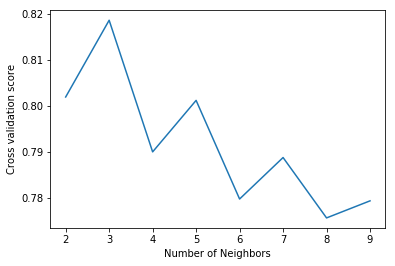

In [14]:
plt.plot(k_range, k_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross validation score')

In [15]:
# Check classification accuracy using the top K that was retrieved from the Knn cross-validation
knn = KNeighborsClassifier(n_neighbors = k_range[((k_scores.index(max(k_scores))))])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))
print("Cohen's Kappa =", cohen_kappa_score(y_test, y_pred))
print("Recall =", recall_score(y_test, y_pred))
print("F1 score =", f1_score(y_test, y_pred))
print("ROC area under curve =", roc_auc_score(y_test, y_pred))

Accuracy = 0.6940045248868778
Cohen's Kappa = 0.23387161369407794
Recall = 0.7296027338744127
F1 score = 0.7911680691731645
ROC area under curve = 0.6430072007291711


In [16]:
# Do a Kfold cross validation on the training data for a logistic regression

logregression = LogisticRegression(solver='liblinear')
CVscores = cross_val_score(logregression, X_train, y_train, cv = 10, scoring = "accuracy")
print(CVscores.mean())

0.6971730130746109


In [17]:
# Check classification accuracy using the logregression

logregression.fit(X_train, y_train)
y_pred = logregression.predict(X_test)
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))
print("Cohen's Kappa =", cohen_kappa_score(y_test, y_pred))
print("Recall =", recall_score(y_test, y_pred))
print("F1 score =", f1_score(y_test, y_pred))
print("ROC area under curve =", roc_auc_score(y_test, y_pred))

Accuracy = 0.7854072398190045
Cohen's Kappa = 0.3668236730863247
Recall = 0.8517727466894489
F1 score = 0.863141187504509
ROC area under curve = 0.6903332638235357


In [18]:
#train using a Support vector machine, a random forest and a logistic regression, 

modelSVC.fit(X_train, y_train)
modelRF.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
#Print cross-validation scores 

print(cross_val_score(modelSVC, X_train, y_train)) 
print(cross_val_score(modelRF, X_train, y_train)) 

#Print model validation scores 

print(modelSVC.score(X_train, y_train))
print(modelRF.score(X_train, y_train))


[0.70708647 0.70883055 0.70433266]
[0.78134753 0.8366991  0.82825408]
0.7079432103298452
0.9905758521510312


In [20]:
# Check classification accuracy of using the Support Vector Machine
y_pred = modelSVC.predict(X_test)
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))
print("Cohen's Kappa =", cohen_kappa_score(y_test, y_pred))
print("Recall =", recall_score(y_test, y_pred))
print("F1 score =", f1_score(y_test, y_pred))
print("ROC area under curve =", roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy = 0.8079185520361991
Cohen's Kappa = 0.4065312121157727
Recall = 0.8822440552470454
F1 score = 0.8794889992902768
ROC area under curve = 0.7014412351083879
[[ 946  871]
 [ 827 6196]]


In [21]:
# Check classification of accuracy using the Random forest
y_pred = modelRF.predict(X_test)
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))
print("Cohen's Kappa =", cohen_kappa_score(y_test, y_pred))
print("Recall =", recall_score(y_test, y_pred))
print("F1 score =", f1_score(y_test, y_pred))
print("ROC area under curve =", roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy = 0.7414027149321267
Cohen's Kappa = 0.29376255899832904
Recall = 0.7949594190516873
F1 score = 0.8300624442462088
ROC area under curve = 0.6646783886672856
[[ 971  846]
 [1440 5583]]


In [22]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [26]:
# create model
model = Sequential()
model.add(Dense(6, input_dim=17, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
#run the neural network
model.fit(X_train, y_train, epochs=150, batch_size = 200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
32682/32682 [==============================] - 1s 45us/step - loss: 0.7149 - acc: 0.5494
Epoch 2/150
32682/32682 [==============================] - 0s 13us/step - loss: 0.6524 - acc: 0.6780
Epoch 3/150
32682/32682 [==============================] - 0s 12us/step - loss: 0.6210 - acc: 0.6988
Epoch 4/150
32682/32682 [==============================] - 0s 13us/step - loss: 0.5913 - acc: 0.7012
Epoch 5/150
32682/32682 [==============================] - 0s 12us/step - loss: 0.5711 - acc: 0.7066
Epoch 6/150
32682/32682 [==============================] - 0s 12us/step - loss: 0.5623 - acc: 0.7065
Epoch 7/150
32682/32682 [==============================] - 0s 13us/step - loss: 0.5602 - acc: 0.7082
Epoch 8/150
32682/32682 [==============================] - 0s 13us/step - loss: 0.5591 - acc: 0.7077
Epoch 9/150
32682/32682 [==============================] - 0s 13us/step - loss: 0.5586 - acc: 0.7080
Epoch 10/150
32682/32682 [=================

32682/32682 [==============================] - 1s 16us/step - loss: 0.5474 - acc: 0.7168
Epoch 79/150
32682/32682 [==============================] - 0s 15us/step - loss: 0.5471 - acc: 0.7151
Epoch 80/150
32682/32682 [==============================] - 0s 13us/step - loss: 0.5473 - acc: 0.7146
Epoch 81/150
32682/32682 [==============================] - 0s 13us/step - loss: 0.5471 - acc: 0.7157
Epoch 82/150
32682/32682 [==============================] - 0s 14us/step - loss: 0.5470 - acc: 0.7165
Epoch 83/150
32682/32682 [==============================] - 0s 13us/step - loss: 0.5473 - acc: 0.7160
Epoch 84/150
32682/32682 [==============================] - 0s 15us/step - loss: 0.5467 - acc: 0.7153: 0s - loss: 0.5515 - ac
Epoch 85/150
32682/32682 [==============================] - 0s 14us/step - loss: 0.5465 - acc: 0.7158
Epoch 86/150
32682/32682 [==============================] - 0s 13us/step - loss: 0.5466 - acc: 0.7162
Epoch 87/150
32682/32682 [==============================] - 0s 13us/ste

In [29]:
#make predictions and round answers
y_pred = model.predict(X_test)
rounded = [round(x[0]) for x in y_pred]
y_pred = np.array(rounded, dtype = 'int64')

print("Accuracy =", metrics.accuracy_score(y_test, y_pred))
print("Cohen's Kappa =", cohen_kappa_score(y_test, y_pred))
print("Recall =", recall_score(y_test, y_pred))
print("F1 score =", f1_score(y_test, y_pred))
print("ROC area under curve =", roc_auc_score(y_test, y_pred))

Accuracy = 0.7529411764705882
Cohen's Kappa = 0.3503328564220727
Recall = 0.7871280079738003
F1 score = 0.8350453172205438
ROC area under curve = 0.7039657651316442


### The best results result from the SVM

Accuracy = 0.8079185520361991

Cohen's Kappa = 0.4065312121157727

Recall = 0.8822440552470454

F1 score = 0.8794889992902768

ROC area under curve = 0.7014412351083879